# Logistic regression model for predicting the target auduiance for social media ads
We'd like to implement an appropriate model so that we know who our target audience is for this specific advertisement, thus maximizing our click-through rate

refer https://www.kaggle.com/johnduva/logistic-regression-social-network-ads

## Importing Libraries

In [2]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from matplotlib.colors import ListedColormap
from sklearn import metrics
import seaborn as sns
%matplotlib inline
import warnings;
warnings.filterwarnings('ignore');

## Importing Dataset

In [3]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [4]:
dataset=pd.read_csv('/content/drive/MyDrive/Colab Notebooks/machine-learning/social-network-ads-logistic-regression/Social_Network_Ads.csv')
dataset

,User ID,Gender,Age,EstimatedSalary,Purchased
0,15624510,Male,19,19000,0
1,15810944,Male,35,20000,0
2,15668575,Female,26,43000,0
3,15603246,Female,27,57000,0
4,15804002,Male,19,76000,0
...,...,...,...,...,...
395,15691863,Female,46,41000,1
396,15706071,Male,51,23000,1
397,15654296,Female,50,20000,1
398,15755018,Male,36,33000,0


## Extracting  Variables

In [5]:
X = dataset.iloc[:,[2,3]].values
X[:10]

array([[    19,  19000],
       [    35,  20000],
       [    26,  43000],
       [    27,  57000],
       [    19,  76000],
       [    27,  58000],
       [    27,  84000],
       [    32, 150000],
       [    25,  33000],
       [    35,  65000]])

In [6]:
Y = dataset.iloc[:,4].values
Y[:10]

array([0, 0, 0, 0, 0, 0, 0, 1, 0, 0])

## Heatmap to see correlation

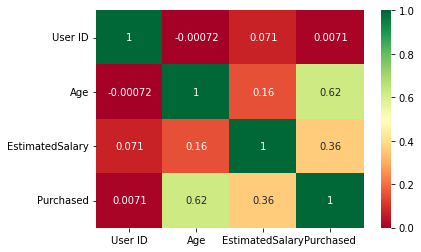

In [7]:
sns.heatmap(dataset.corr(), annot = True, cmap = 'RdYlGn')

## Train Test Split

In [9]:
X_train,x_test,y_train,y_test = train_test_split(X,Y,test_size=1/3,random_state=32)
x_test[:10]

array([[    60, 102000],
       [    24,  89000],
       [    27,  96000],
       [    58,  47000],
       [    47, 144000],
       [    38,  80000],
       [    34,  25000],
       [    47, 105000],
       [    57,  33000],
       [    29,  61000]])

## Feature Scaling

In [10]:
standard_Scaler=StandardScaler()
X_train = standard_Scaler.fit_transform(X_train)
x_test = standard_Scaler.transform(x_test)

In [11]:
x_test[:10]

array([[ 2.2508008 ,  0.96423267],
       [-1.3224201 ,  0.57131297],
       [-1.02465169,  0.78288512],
       [ 2.05228853, -0.69811991],
       [ 0.96047103,  2.23366555],
       [ 0.06716581,  0.29929164],
       [-0.32985874, -1.36306094],
       [ 0.96047103,  1.05490645],
       [ 1.95303239, -1.1212642 ],
       [-0.82613942, -0.27497561]])

## Instantiating and fitting the model to training Dataset

In [12]:
log_reg=LogisticRegression(random_state=0)
log_reg.fit(X_train,y_train)

LogisticRegression(random_state=0)

## Prediction for Test Dataset

In [13]:
y_test_pred=log_reg.predict(x_test)
y_test_pred

array([1, 0, 0, 1, 1, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 1, 1, 0,
       1, 1, 0, 1, 0, 0, 1, 0, 1, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0,
       0, 1, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 1, 0,
       0, 1, 0, 1, 0, 0, 1, 1, 1, 1, 0, 0, 0, 0, 0, 1, 1, 0, 1, 1, 0, 1,
       1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0,
       0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0,
       0, 0])

In [14]:
y_test

array([1, 0, 1, 1, 1, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 1, 1, 0,
       1, 1, 0, 0, 0, 0, 1, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0,
       0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 1, 1, 0,
       0, 1, 0, 0, 1, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 1, 1,
       1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 1, 1, 0, 0,
       0, 1, 1, 0, 0, 0, 1, 1, 0, 1, 0, 1, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0,
       0, 0])

## Visualizing the Training Set Result

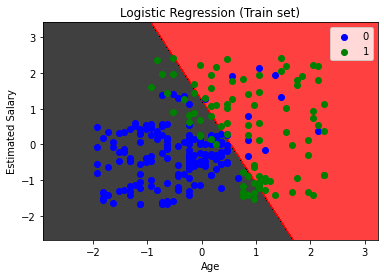

In [15]:
X_set,y_set = X_train,y_train
X1,X2 = np.meshgrid(np.arange(start=X_set[:,0].min() - 1,stop=X_set[:,0].max()+1,step=0.01),
                    np.arange(start=X_set[:,1].min() - 1,stop=X_set[:,1].max()+1,step=0.01))
plt.contourf(X1,X2,log_reg.predict(np.array([X1.ravel(),X2.ravel()]).T).reshape(X1.shape),
                        alpha=0.75,cmap=ListedColormap(('black','red')))

plt.xlim(X1.min(),X1.max())
plt.ylim(X2.min(),X2.max())
for i,j in enumerate(np.unique(y_set)):
    plt.scatter(X_set[y_set ==j,0],X_set[y_set == j,1],
               c=ListedColormap(['blue','green'])(i),label=j)

plt.title('Logistic Regression (Train set)')
plt.xlabel('Age')
plt.ylabel('Estimated Salary')
plt.legend()
plt.show()

## Visualizing the Testing Set results

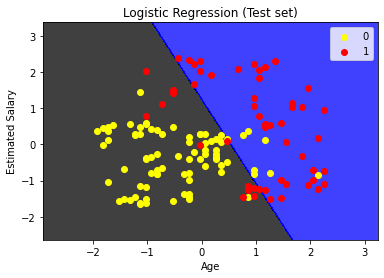

In [16]:
X_set,y_set = x_test,y_test
X1,X2 = np.meshgrid(np.arange(start=X_set[:,0].min() - 1,stop=X_set[:,0].max()+1,step=0.01),
                    np.arange(start=X_set[:,1].min() - 1,stop=X_set[:,1].max()+1,step=0.01))
plt.contourf(X1,X2,log_reg.predict(np.array([X1.ravel(),X2.ravel()]).T).reshape(X1.shape),
                        alpha=0.75,cmap=ListedColormap(('black','blue')))

plt.xlim(X1.min(),X1.max())
plt.ylim(X2.min(),X2.max())
for i,j in enumerate(np.unique(y_set)):
    plt.scatter(X_set[y_set ==j,0],X_set[y_set == j,1],
               c=ListedColormap(['yellow','red'])(i),label=j)

plt.title('Logistic Regression (Test set)')
plt.xlabel('Age')
plt.ylabel('Estimated Salary')
plt.legend()
plt.show()

## Confusion Matrix

In [17]:
from sklearn.metrics import confusion_matrix
conf_matrix = confusion_matrix(y_test,y_test_pred)
conf_matrix

array([[74,  7],
       [13, 40]])

In [ ]:
print(conf_matrix[0][0])
print(conf_matrix[1][1])

74
40


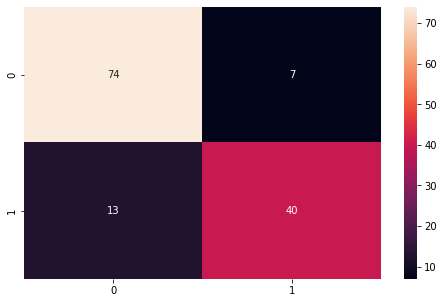

In [18]:
import seaborn as sns
fig, ax = plt.subplots(figsize=(8,5))
sns.heatmap(conf_matrix, annot = True, ax=ax)


In [ ]:
# fig, ax = plt.subplots(figsize=(12,8))
# sns.heatmap(ax=ax)

## Accuracy

In [19]:
accuracy = ((conf_matrix[0][0])+(conf_matrix[1][1]))/len(y_test)
accuracy

0.8507462686567164

## Mis Classification Rate

In [20]:
mis_cla_rate  = ((conf_matrix[0][1])+(conf_matrix[1][0]))/len(y_test)
mis_cla_rate

0.14925373134328357

## Accuracy, Precision, Recall etc

In [21]:
print("Accuracy: ", metrics.accuracy_score(y_test,y_test_pred))

Accuracy:  0.8507462686567164


In [22]:
print("Precision: ", metrics.precision_score(y_test,y_test_pred))

Precision:  0.851063829787234


In [ ]:
print("Recall: ", metrics.recall_score(y_test,y_test_pred))

Recall:  0.7547169811320755


## ROC and AUC

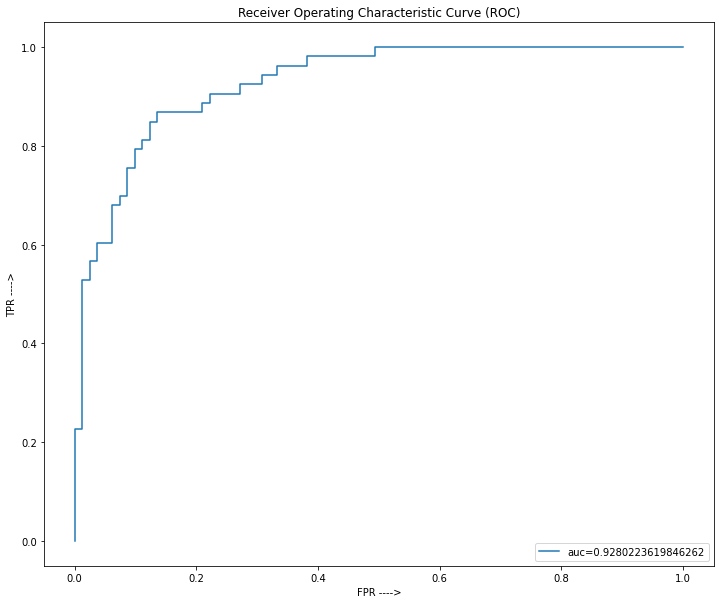

In [23]:
y_pred_proba = log_reg.predict_proba(x_test)[::,1]
fpr, tpr, _ = metrics.roc_curve(y_test,  y_pred_proba)
auc = metrics.roc_auc_score(y_test, y_pred_proba)
plt.figure(figsize=(12,10))
plt.plot(fpr,tpr,label="auc="+str(auc))
plt.legend(loc=4)
plt.title("Receiver Operating Characteristic Curve (ROC)")
plt.xlabel("FPR ---->")
plt.ylabel("TPR ---->")
plt.show()